In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

In [ ]:
#reading the California Housing Dataset
url = "https://personal.utdallas.edu/~mxm190127/housing.csv"
housing_data = pd.read_csv(url)
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#checking for null values
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#replacing null values with the mean value for the variable
housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


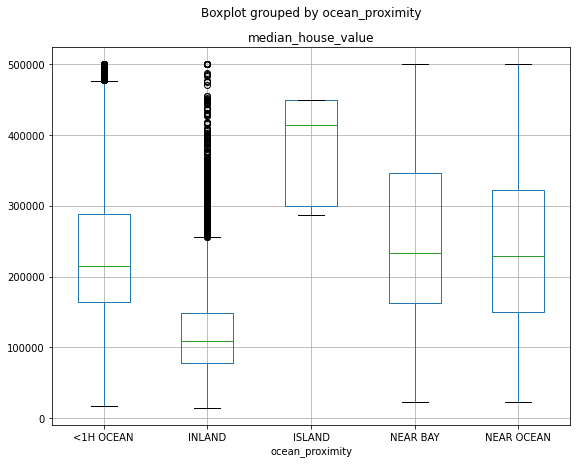

In [ ]:
#boxplot of categorical variable vs. target variable
housing_data.boxplot('median_house_value', 'ocean_proximity', figsize=(9,7))

In [ ]:
#using one-hot encoding to convert categorical into continuous data
df = pd.get_dummies(housing_data, columns=['ocean_proximity'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8ec818590>,
      dtype=object)

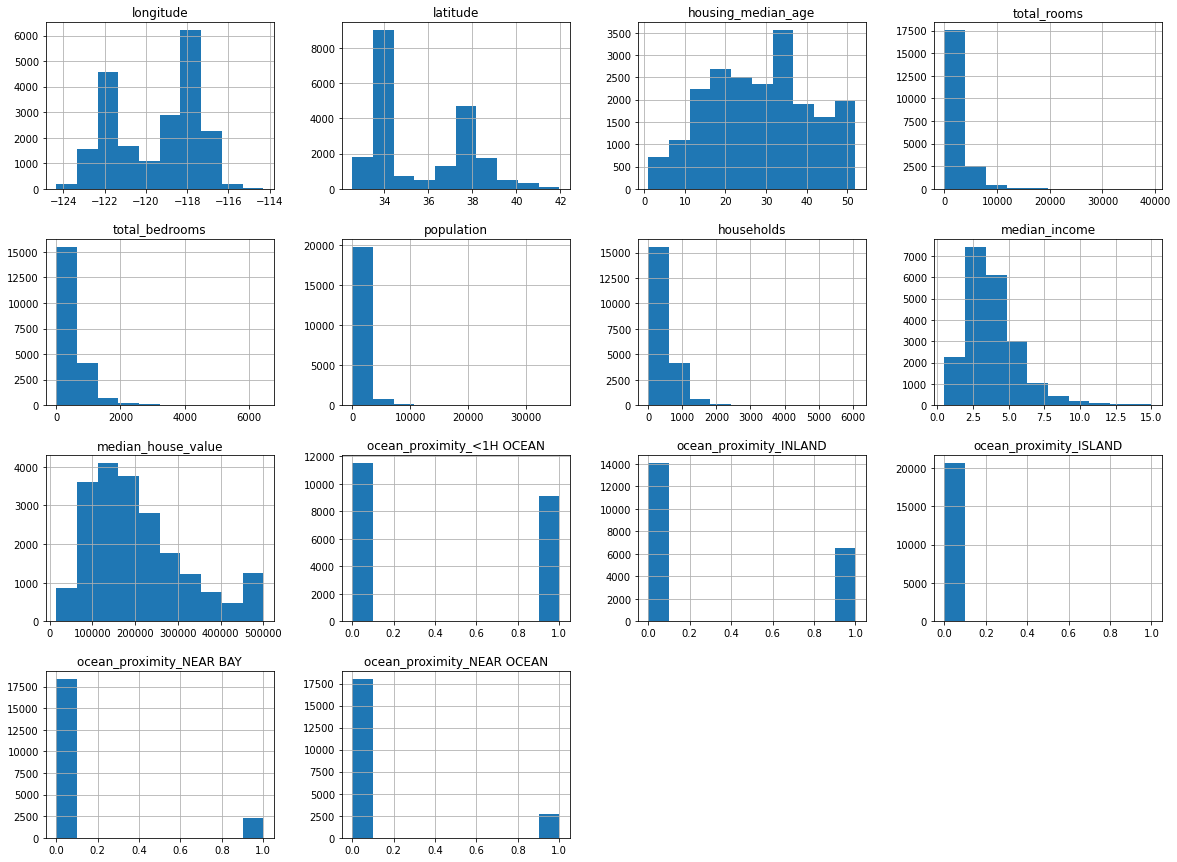

In [ ]:
#plotting histograms
df.hist(figsize=(20,15))

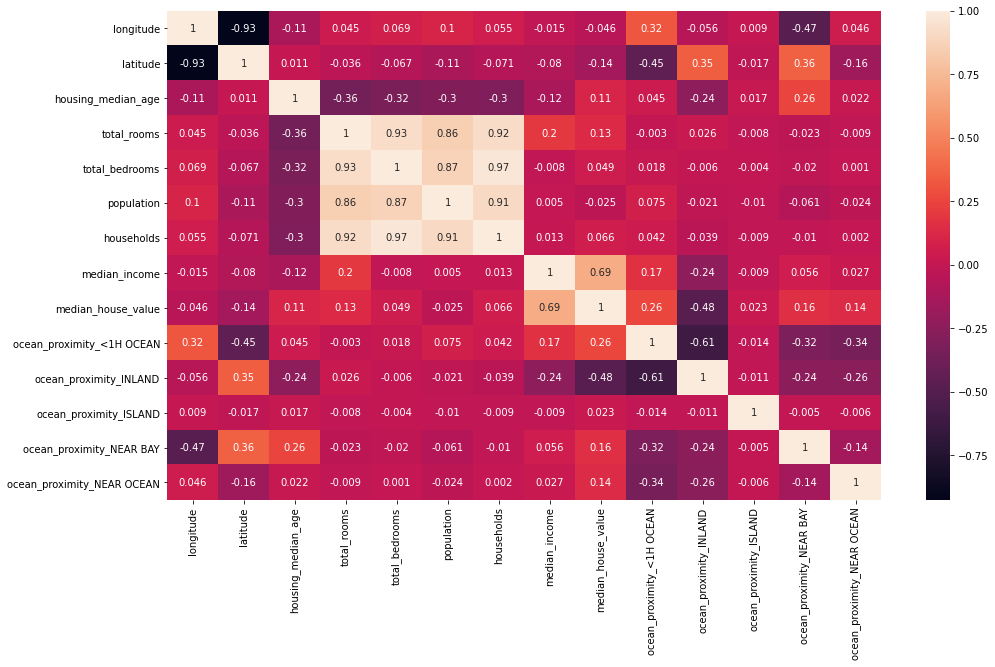

In [ ]:
#correlation matrix
plt.figure(figsize=(16,9))
correlation_matrix = df.corr().round(3)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
#experiment 1
X = df[['median_income']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[41715.89294989]
45036.68065820748
0.48490837623606464
84300.87153316838


In [ ]:
#experiment 2
X = df[['median_income', 'ocean_proximity_INLAND']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 36798.30878804 -84245.94430372]
90797.53863659836
0.5925004537583891
74981.37245917703


In [ ]:
#experiment 3
X = df[['median_income', 'ocean_proximity_INLAND', 'ocean_proximity_<1H OCEAN']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 36918.38799055 -97261.201445   -20212.4302136 ]
103427.09920053546
0.595539886846771
74701.21580359849


In [ ]:
#experiment 4
X = df[['median_income', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 36775.08306595 -81491.88818592  17053.13336464]
88118.0839595829
0.5946131539657431
74786.74767777376


In [ ]:
#experiment 5
X = df[['median_income', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR OCEAN']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 36901.73717022 -81448.99499893  14416.44961881]
87668.37549148721
0.5929226813317592
74942.51670050713


In [ ]:
#experiment 6
X = df[['median_income', 'ocean_proximity_INLAND', 'latitude']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 36780.28542366 -86677.57626757   1492.73419282]
38442.84282154875
0.593065868461362
74929.33523945515


In [ ]:
#experiment 7
X = df[['median_income', 'ocean_proximity_INLAND', 'total_rooms']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 3.64869697e+04 -8.46533729e+04  1.22160478e+00]
88903.7672398072
0.5930985794882815
74926.32361598866


In [ ]:
#experiment 8
X = df[['median_income', 'ocean_proximity_INLAND', 'housing_median_age']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 38016.2901047  -77088.31313458    953.82829188]
56559.766129288415
0.604551142202245
73864.3675279136


In [ ]:
#experiment 9
X = df[['median_income', 'ocean_proximity_INLAND', 'housing_median_age', 'households']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score)
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))) 

[ 3.83342401e+04 -7.40287754e+04  1.22867532e+03  2.64651842e+01]
33253.68381474205
0.6109294282230083
73266.25823553838


In [ ]:
#experiment 10
X = df[['median_income', 'ocean_proximity_INLAND', 'housing_median_age', 'households', 'total_bedrooms']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))) 

[ 3.85741008e+04 -7.53025624e+04  1.27379168e+03 -3.67980733e+01
  5.96136363e+01]
30981.799938484124
0.613833100120343
72992.34958542146


In [ ]:
#experiment 11
X = df[['median_income', 'ocean_proximity_INLAND', 'housing_median_age', 'households', 'longitude']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))) 

[ 3.81563945e+04 -7.51811908e+04  1.17270883e+03  2.66198903e+01
 -2.58883042e+03]
-273726.76184223394
0.6124369997718668
73124.17433199659


In [ ]:
#experiment 12
X = df[['median_income', 'ocean_proximity_INLAND', 'housing_median_age', 'households', 'population']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 3.81744453e+04 -7.31616500e+04  1.14727411e+03  1.39048180e+02
 -4.21140366e+01]
39729.87804063852
0.637829171323185
70688.13997131982


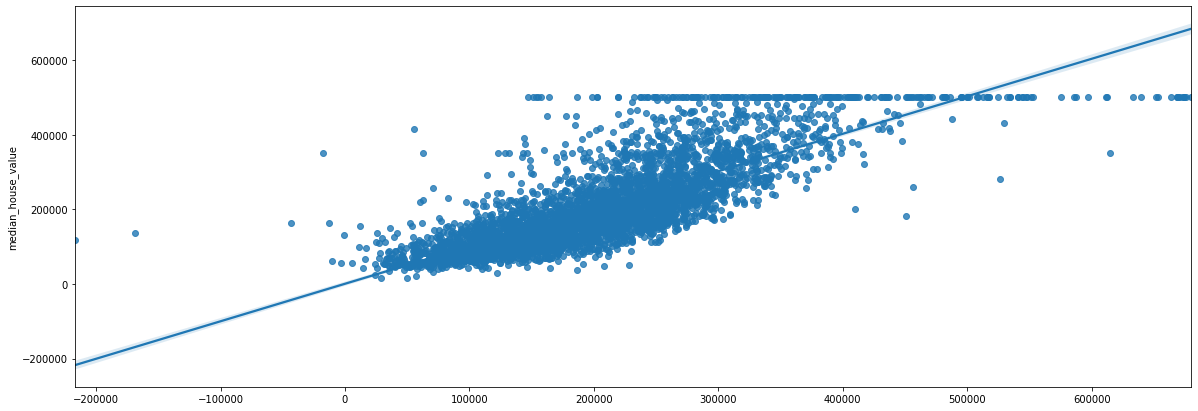

In [ ]:
#regression plot of predicted vs. test data for experiment 12
plt.figure(figsize=(20,7))
sns.regplot(x=y_test_predict, y=y_test, data=df) 

In [ ]:
#experiment 13
X = df[['median_income', 'ocean_proximity_INLAND', 'housing_median_age', 'households', 'ocean_proximity_ISLAND']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 3.83534862e+04 -7.39475169e+04  1.22541538e+03  2.65209758e+01
  1.82725278e+05]
33163.33322049372
0.6109038236763358
73268.66900443453


In [ ]:
#experiment 14
X = df[['median_income', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'housing_median_age', 'households', 'population', 'ocean_proximity_<1H OCEAN', 'latitude', 'longitude', 'total_bedrooms', 'total_rooms']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 3.89138790e+04 -6.36654267e+04  1.33701996e+05 -2.78015484e+04
 -1.80818126e+04  1.03800988e+03  8.20780051e+01 -3.91192124e+01
 -2.41532079e+04 -2.48330321e+04 -2.61550697e+04  7.13095793e+01
 -5.47147673e+00]
-2189180.7784567396
0.6508315183818003
69407.64961434438


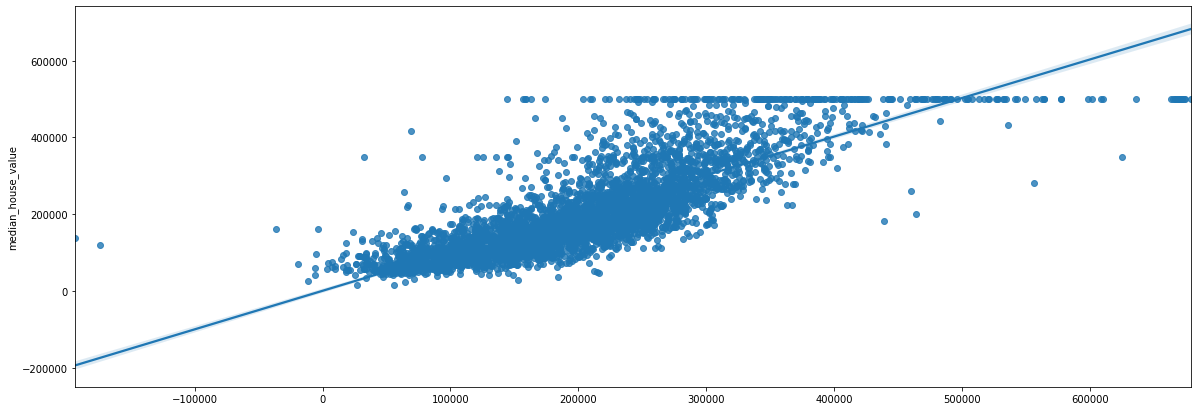

In [ ]:
#regression plot of predicted vs. test data for experiment 14
plt.figure(figsize=(20,7))
sns.regplot(x=y_test_predict, y=y_test, data=df) 

In [ ]:
#dropping categorical variable instead of converting it to continuous data
df_1 = housing_data.drop(labels='ocean_proximity', axis=1, inplace=False)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


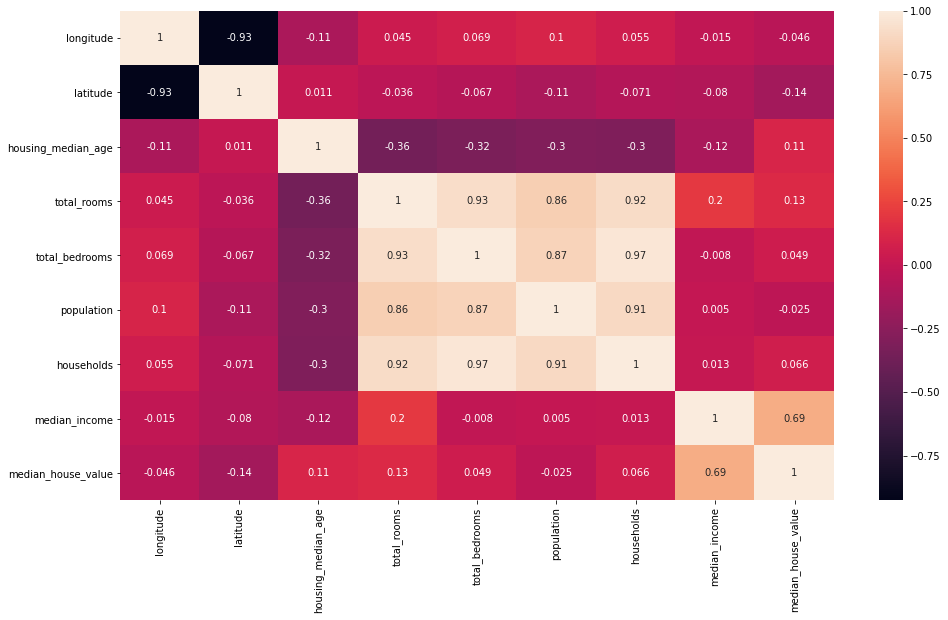

In [ ]:
#correlation matrix
plt.figure(figsize=(16,9))
correlation_matrix = df_1.corr().round(3)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
#experiment 15
X = df_1[['median_income']]
Y = df_1['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
print(metrics.r2_score(y_test, y_test_predict))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[41715.89294989]
45036.68065820748
0.48490837623606464
84300.87153316838


In [ ]:
#experiment 16
X = df_1[['median_income', 'latitude']]
Y = df_1['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
print(metrics.r2_score(y_test, y_test_predict))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[41311.56234195 -4870.73217084]
220177.74293737323
0.4923887092703556
83686.51014347991


In [ ]:
#experiment 17
X = df_1[['median_income', 'total_rooms']]
Y = df_1['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
print(metrics.r2_score(y_test, y_test_predict))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 4.17235410e+04 -3.24905937e-02]
45092.93467697466
0.48491789379158734
84300.09269898168


In [ ]:
#experiment 18
X = df_1[['median_income', 'housing_median_age']]
Y = df_1['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
print(metrics.r2_score(y_test, y_test_predict))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[43153.21659868  1713.31921357]
-9479.451400831575
0.5244593831562463
80999.74080097071


In [ ]:
#experiment 19
X = df_1[['median_income', 'housing_median_age', 'households']]
Y = df_1['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
print(metrics.r2_score(y_test, y_test_predict))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[4.33201421e+04 2.07140308e+03 3.87274562e+01]
-39748.65736409949
0.5362814644543781
79986.56537552178


In [ ]:
#experiment 20
X = df_1[['median_income','housing_median_age', 'households', 'total_bedrooms']]
Y = df_1['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
print(metrics.r2_score(y_test, y_test_predict))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[4.34622878e+04 2.09742565e+03 1.12053492e+01 2.60211568e+01]
-41288.62188558394
0.5372229253855031
79905.3280722402


In [ ]:
#experiment 21
X = df_1[['median_income', 'housing_median_age', 'households', 'longitude']]
Y = df_1['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
print(metrics.r2_score(y_test, y_test_predict))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 4.32807435e+04  2.05456034e+03  3.88633040e+01 -1.01762904e+03]
-160864.61980791102
0.5365637359988217
79962.21723486198


In [ ]:
#experiment 22
X = df_1[['median_income', 'housing_median_age', 'households', 'population']]
Y = df_1['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
print(metrics.r2_score(y_test, y_test_predict))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[43095.58522718  1977.47012148   154.44441591   -43.3416565 ]
-32203.65413126463
0.5639746530983029
77561.40880477776


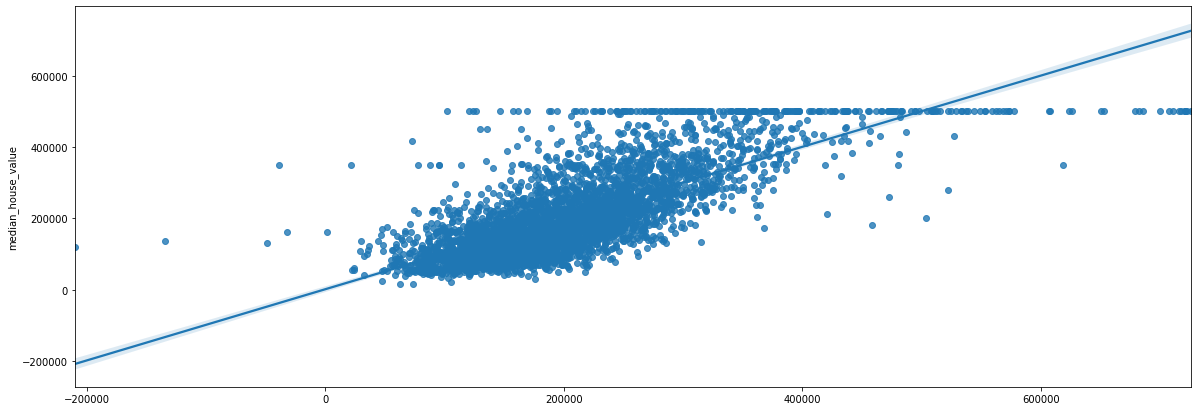

In [ ]:
#regression plot of predicted vs. test data for experiment 22
plt.figure(figsize=(20,7))
sns.regplot(x=y_test_predict, y=y_test, data=df_1) 

In [ ]:
#experiment 23
X = df_1[['median_income', 'latitude', 'housing_median_age', 'households', 'longitude', 'population', 'total_bedrooms', 'total_rooms']]
Y = df_1['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)
y_test_predict = reg.predict(x_test)
r2_score = metrics.r2_score(y_test, y_test_predict)
print(r2_score) 
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

[ 3.98585379e+04 -4.21450042e+04  1.12523498e+03  8.44778892e+01
 -4.23129358e+04 -3.98200093e+01  8.03007026e+01 -7.25820820e+00]
-3547042.6243745657
0.6423207534496642
70248.441197765


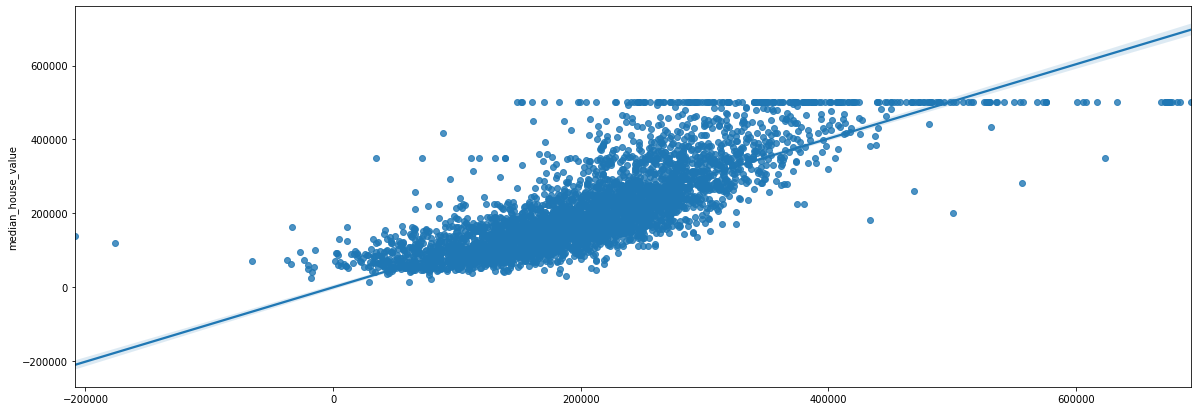

In [ ]:
#regression plot of predicted vs. test data for experiment 23
plt.figure(figsize=(20,7))
sns.regplot(x=y_test_predict, y=y_test, data=df_1) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


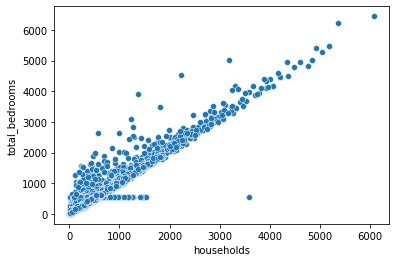

In [ ]:
#scatterplot to display some of the most linear data in the housing dataset
sns.scatterplot(df['households'], df['total_bedrooms'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


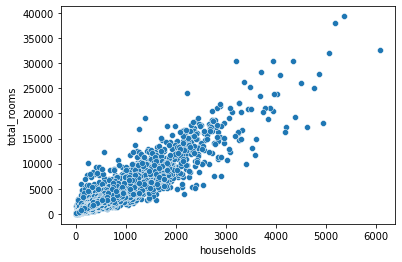

In [ ]:
#scatterplot to display some of the most linear data in the housing dataset
sns.scatterplot(df['households'], df['total_rooms'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


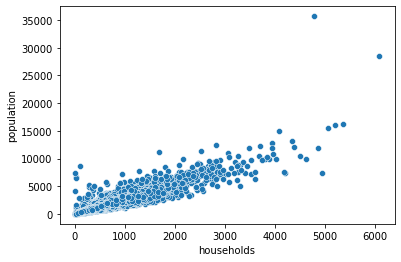

In [ ]:
#scatterplot to display some of the most linear data in the housing dataset
sns.scatterplot(df['households'], df['population'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


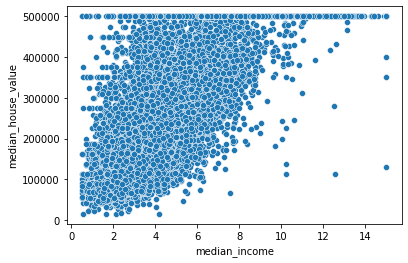

In [ ]:
#scatterplot to display data that is (more or less) linear with the target variable
sns.scatterplot(df['median_income'], df['median_house_value'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


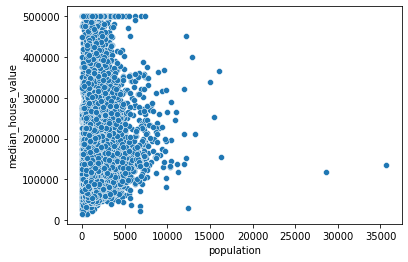

In [ ]:
#scatterplot to display data that is (more or less) linear with the target variable
sns.scatterplot(df['population'], df['median_house_value'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


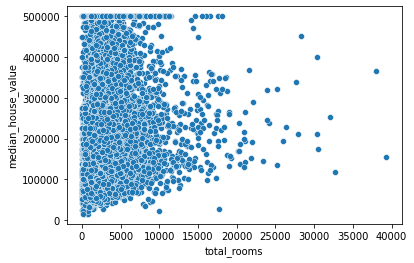

In [ ]:
#scatterplot to display data that is (more or less) linear with the target variable
sns.scatterplot(df['total_rooms'], df['median_house_value'])